<a href="https://colab.research.google.com/github/BellaDir/Astro-Data/blob/main/Calculating_the_Hubble_Constant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import astropy.units as u
import astropy.constants as ac

In [3]:
# Uploading the data file
from google.colab import files
uploaded = files.upload()

Saving Tonry_2003.vot to Tonry_2003.vot


In [4]:
dat = astropy.io.ascii.read("Tonry_2003.vot") # Reading the data in the file

/usr/local/lib/python3.10/dist-packages/astropy/io/ascii/html.py:91: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  soup = BeautifulSoup("\n".join(lines))


Text(0, 0.5, 'Velocity [km/s]')

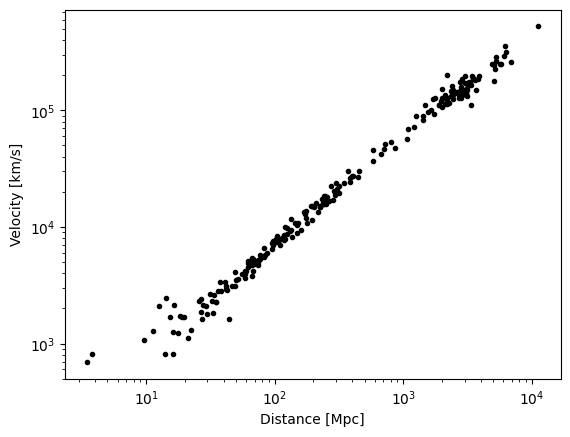

In [5]:
# Calculating the distance and its error in Mpc
distance = 10**dat["col8"] / 72.0 * u.mpc
distance_error = (10**(dat["col8"]+dat["col9"]) - 10**dat["col8"]) / 72.0 * u.mpc
# Calculating the velocity in km/s
velocity = 10**dat["col7"] * u.km / u.s
# Plotting the velocity versus distance
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")

In [6]:
# Fitting a linear model to the data
x = distance.to(u.mpc).value
ind = np.where((x > 0) & (x < 700))
z = np.polyfit(x[ind], velocity.to(u.km / u.s).value[ind], 1)
p = np.poly1d(z)

In [7]:
# Calculating the velocities from the linear fit
velocity_model = p(x)

In [8]:
# Extracting the slope and intercept of the fit line
slope, intercept = z
H_0 = slope  # The slope of the fit line, gives us the Hubble constant
print(f"Hubble Constant (H_0) = {H_0:.2f} km/s/Mpc")

Hubble Constant (H_0) = 67.48 km/s/Mpc


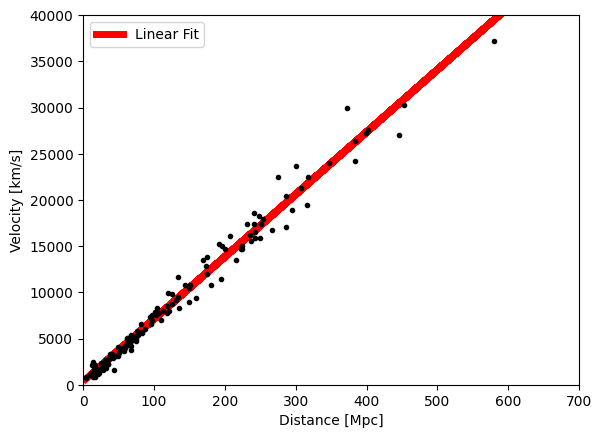

In [9]:
# Plotting the linear fit line alongside the data points
plt.plot(x, velocity_model, color="red", linewidth=5, label='Linear Fit')
plt.plot(distance.to(u.mpc).value, velocity.to(u.km / u.s).value, marker=".", color="black", linestyle="none")
plt.xlim(0, 700)
plt.ylim(0, 4e4)
plt.xlabel("Distance [Mpc]")
plt.ylabel("Velocity [km/s]")
plt.legend()
plt.show()

In [10]:
# Calculating the Hubble constant
H_0_in_s = H_0 / (3.0857e19)
# Calculating the estimated age of the universe and converting the units to years
age_of_universe_seconds = 1 / H_0_in_s
age_of_universe_years = age_of_universe_seconds / (3.154e7)

print(f"Estimated Age of the Universe = {age_of_universe_years / 1e9:.2f} billion years")

Estimated Age of the Universe = 14.50 billion years
